In [2]:
# Subir el archivo CSV desde tu computadora
from google.colab import files
uploaded = files.upload()

# Importar pandas y leer el archivo CSV
import pandas as pd

# Obtén el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_excel(file_name)

# Muestra las primeras filas del DataFrame
df.head()

Saving Dataset_online_Ecommerce_clusterizado.xlsx to Dataset_online_Ecommerce_clusterizado.xlsx


Order_Number State_Code Customer_Name Order_Date     Status  \
0        139374         AP   Adhir Samal 2020-01-11  Delivered   
1        139500         MH   Adhir Samal 2020-03-24  Delivered   
2        139584         WB   Adhir Samal 2020-03-28  Delivered   
3        139626         TR   Adhir Samal 2020-03-29      Order   
4        139710         MH   Adhir Samal 2020-03-29      Order   

                  Product  Category    Brand  Cost  Sales  Quantity  \
0              512 GB M.2       SSD  Samsung  6500   8450         1   
1              260 GB SSD       SSD  Samsung  4500   5850         1   
2  USB Backlight Keyboard  Keyboard     Dell   850   1105         4   
3   Micro ATX motherboard     Mouse      MSI  6540   8502         1   
4       Wireless Keyboard  Keyboard     Dell  1150   1495         4   

   Total_Cost  Total_Sales Assigned Supervisor  Recency  Frequency  \
0        6500         8450         Ajay Sharma      369  16.134328   
1        4500         5850         Vijay Singh      369  16.134328   
2        3400         4420         Aarvi Gupta      369  16.134328   
3        6540         8502        Advika Joshi      369  16.134328   
4        4600         5980        Advika Joshi      369  16.134328   

          Value  Cluster  
0  18061.282353        0  
1  18061.282353        0  
2  18061.282353        0  
3  18061.282353        0  
4  18061.282353        0

In [3]:
#Tratamiento de datos

import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar el codificador a la columna 'Item_ID'
df['Product'] = label_encoder.fit_transform(df['Product'])

# Mostrar las primeras filas del dataset transformado
print(df.head())

   Order_Number State_Code Customer_Name Order_Date     Status  Product  \
0        139374         AP   Adhir Samal 2020-01-11  Delivered      651   
1        139500         MH   Adhir Samal 2020-03-24  Delivered      367   
2        139584         WB   Adhir Samal 2020-03-28  Delivered     1218   
3        139626         TR   Adhir Samal 2020-03-29      Order     1066   
4        139710         MH   Adhir Samal 2020-03-29      Order     1221   

   Category    Brand  Cost  Sales  Quantity  Total_Cost  Total_Sales  \
0       SSD  Samsung  6500   8450         1        6500         8450   
1       SSD  Samsung  4500   5850         1        4500         5850   
2  Keyboard     Dell   850   1105         4        3400         4420   
3     Mouse      MSI  6540   8502         1        6540         8502   
4  Keyboard     Dell  1150   1495         4        4600         5980   

  Assigned Supervisor  Recency  Frequency         Value  Cluster  
0         Ajay Sharma      369  16.134328  18061.

In [5]:
# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar el codificador a la columna 'Item_ID'
df['Customer_Name'] = label_encoder.fit_transform(df['Customer_Name'])

# Mostrar las primeras filas del dataset transformado
print(df.head())

   Order_Number State_Code  Customer_Name Order_Date     Status  Product  \
0        139374         AP              0 2020-01-11  Delivered      651   
1        139500         MH              0 2020-03-24  Delivered      367   
2        139584         WB              0 2020-03-28  Delivered     1218   
3        139626         TR              0 2020-03-29      Order     1066   
4        139710         MH              0 2020-03-29      Order     1221   

   Category    Brand  Cost  Sales  Quantity  Total_Cost  Total_Sales  \
0       SSD  Samsung  6500   8450         1        6500         8450   
1       SSD  Samsung  4500   5850         1        4500         5850   
2  Keyboard     Dell   850   1105         4        3400         4420   
3     Mouse      MSI  6540   8502         1        6540         8502   
4  Keyboard     Dell  1150   1495         4        4600         5980   

  Assigned Supervisor  Recency  Frequency         Value  Cluster  
0         Ajay Sharma      369  16.134328  

In [7]:
# Datos
# Seleccionar un subconjunto de columnas
selected_columns = ['Customer_Name', 'Product']
filtered_data = df[selected_columns]

# Mostrar las primeras filas del dataset filtrado
print("Dataset Filtrado:")
print(filtered_data.head())

Dataset Filtrado:
   Customer_Name  Product
0              0      651
1              0      367
2              0     1218
3              0     1066
4              0     1221


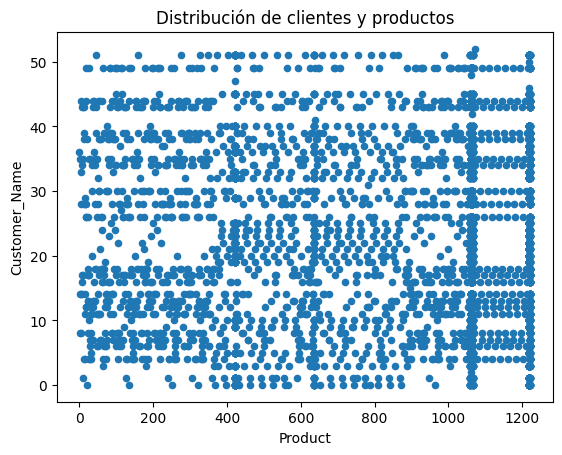

In [10]:
filtered_data.plot(
    x    = 'Product',
    y    = 'Customer_Name',
    kind = "scatter",
    title   = 'Distribución de clientes y productos'
);

In [11]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = filtered_data['Product'], y =  filtered_data['Customer_Name'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.002463975319945061
P-value:  0.8709994384972595
